In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('datasets/bike_share.csv', parse_dates=['dteday'])
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Manipulating Data

## crosstab()

In [28]:
df_crosstab = pd.crosstab(df['mnth'], df['weekday'], values=df['total_rentals'], aggfunc='mean').round(0).astype(int)
df_crosstab

weekday,0,1,2,3,4,5,6
mnth,,,,,,,
1,1816,1927,2568,2139,2513,2446,1957
2,2248,2604,2824,2813,2878,2933,2266
3,3301,3546,3574,3670,3817,3926,3939
4,4417,4516,4556,4331,4764,4387,4446
5,5320,4512,5025,5119,5893,5751,5978
6,5940,5478,5681,5701,5622,5616,6344
7,5298,5792,5844,5814,5624,5406,5232
8,4703,5518,5930,6077,6038,5958,5224
9,6160,5637,5184,5668,5486,5747,6394


## pivot_table()

In [13]:
df.pivot_table(index='mnth', columns='weekday', values='total_rentals', aggfunc='mean').round(0)

weekday,0,1,2,3,4,5,6
mnth,,,,,,,
1,1816.0,1927.0,2568.0,2139.0,2513.0,2446.0,1957.0
2,2248.0,2604.0,2824.0,2813.0,2878.0,2933.0,2266.0
3,3301.0,3546.0,3574.0,3670.0,3817.0,3926.0,3939.0
4,4417.0,4516.0,4556.0,4331.0,4764.0,4387.0,4446.0
5,5320.0,4512.0,5025.0,5119.0,5893.0,5751.0,5978.0
6,5940.0,5478.0,5681.0,5701.0,5622.0,5616.0,6344.0
7,5298.0,5792.0,5844.0,5814.0,5624.0,5406.0,5232.0
8,4703.0,5518.0,5930.0,6077.0,6038.0,5958.0,5224.0
9,6160.0,5637.0,5184.0,5668.0,5486.0,5747.0,6394.0


# Plotting Heatmap

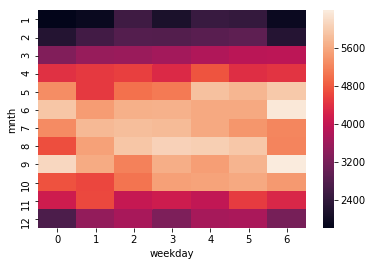

In [16]:
sns.heatmap(df_crosstab);

### Customizing a heatmap

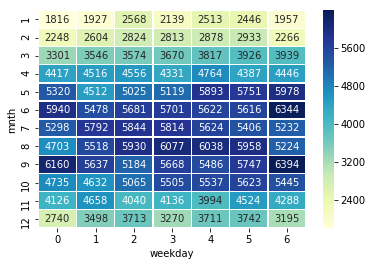

In [36]:
# plt.figure(figsize=(10,8))
sns.heatmap(df_crosstab, annot=True, fmt='d',
           cmap='YlGnBu', linewidth=.5);

### Centering a heatmap

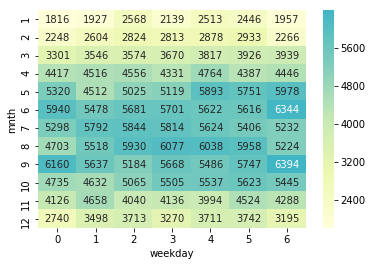

In [35]:
sns.heatmap(df_crosstab, annot=True, fmt='d', cmap='YlGnBu', cbar=True,
           center=df_crosstab.loc[9,6]);

## Correlation matrix

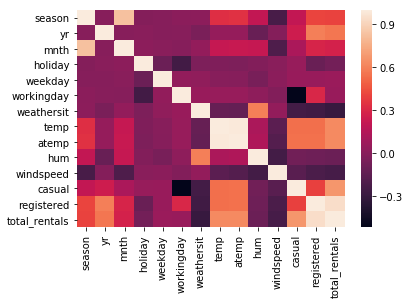

In [37]:
sns.heatmap(df.corr());

# Daily Show Dataset

In [38]:
df = pd.read_csv('datasets/daily_show_guests_cleaned.csv')
df.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


In [40]:
# Create a crosstab table of the data
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])
pd_crosstab

YEAR,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Group,,,,,,,,,,,,,,,,,
Academic,0,0,2,0,4,1,12,9,13,5,11,8,10,8,8,10,2
Acting,108,100,92,84,74,51,44,44,25,26,22,45,42,33,60,47,33
Advocacy,0,1,0,1,0,4,0,0,2,3,1,1,1,2,2,3,3
Athletics,0,3,1,2,0,2,2,5,4,1,7,5,2,7,4,4,3
Business,0,1,0,0,0,2,1,1,2,1,4,2,3,3,3,1,1
Clergy,0,0,0,1,1,1,0,0,1,0,1,0,1,2,0,0,0
Comedy,25,12,11,5,12,7,5,8,9,7,7,7,7,6,6,9,7
Consultant,0,0,0,0,1,4,1,4,2,3,2,1,0,0,0,0,0
Government,0,0,2,1,2,3,1,3,1,0,5,3,3,3,7,6,0


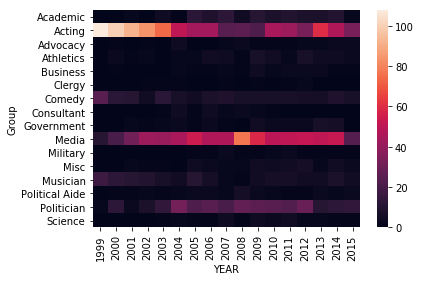

In [43]:
# Plot a heatmap of the table
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90);

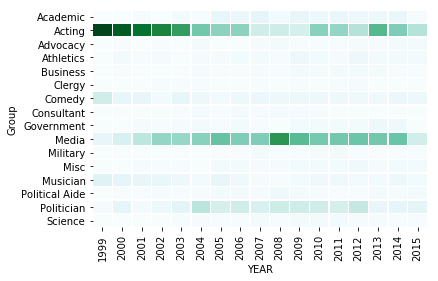

In [45]:
# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar=False, cmap="BuGn", linewidths=.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90);